**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [7]:
!pip -q install yellowbrick

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [9]:
import pickle
with open('/home/rafael/Documentos/Faculdade/Quarto_Periodo/IA/Bases/Play.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [10]:
modelo = RandomForestClassifier(n_estimators=300, max_features='log2', criterion='gini', max_depth=8)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=300)



> **Vamos testar o modelo?**



In [11]:
previsoes = modelo.predict(X_teste)

In [12]:
previsoes

array(['no', 'yes', 'yes'], dtype=object)



> **Será se o modelo acertou?**



In [13]:
y_teste

array(['yes', 'yes', 'yes'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [15]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 0],
       [1, 2]])

0.6666666666666666

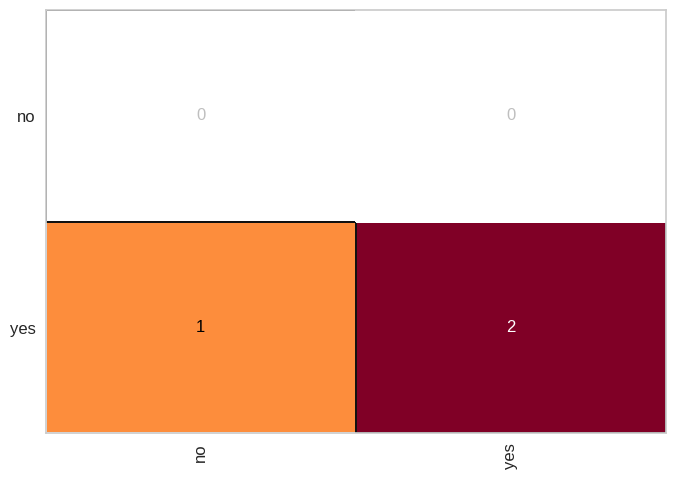

In [16]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [17]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         0
         yes       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/home/rafael/Documentos/Faculdade/Quarto_Periodo/IA/Python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rafael/Documentos/Faculdade/Quarto_Periodo/IA/Python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rafael/Documentos/Faculdade/Quarto_Periodo/IA/Python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

**Vamos ver os atributos que o Random considerou como mais importantes?**

In [18]:
print(modelo.feature_importances_) 

[0.20590721 0.08400841 0.18491215 0.04894679 0.04760407 0.09643017
 0.14850597 0.18368523]


**Vamos agora analisar como estes dados estão distribuídos?**